# Perceptron Model
In 1957 Frank Rosenblatt published the first concept of the perceptron learning rule based on the _MCP neuron model_ (McCullock and Pitts, 1943).

Perceptron automatically learns the ___optimal weight coeffcients___ which are then multiplied with the ___input features___ in order to make the decision of whether a _neuron_ fres or not. 

This can be used to predict if a sample belonged to one class or the other. We can pose this problem as a _binary classifcation_ task where we refer to our two classes as 1 (positive class) and -1 (negative class) for simplicity. 

- We can define an ___activation function___ $\phi(z)$ that takes a linear combination of certain _input values_ $x$ and a corresponding _weight vector_ $w$ , where $z$ is the so-called _net input_ $z = w_1x_1+...+w_mx_m$:
### $$w=\begin{pmatrix}
w_1\\
:\\
w_m
\end{pmatrix}, x=\begin{pmatrix}
x_1\\
:\\
x_m
\end{pmatrix}$$

- Now, if the _activation_ of a particular sample  **$x^{(i)}$**, ( i.e. the output of **$\phi(\:z\:)$** ), is greater than a defned _threshold_ $\theta$ , we predict class 1 and otherwise, class -1. In the perceptron algorithm, the _Activation Function_ $\phi(z)$  is a simple _Unit Step function_ (a.k.a. _Heaviside step function_):
### $$\phi(z)= 1 \;if z >=\theta$$ $$\phi(z)= -1 \;if otherwise$$

The whole idea behind  thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fres or it doesn't. Thus, Rosenblatt's perceptron rule is fairly simple and can be summarized by the following steps:
1. Initialize the weights to 0 or small random numbers.
2. For each training sample $x^{(i)}$ perform the following steps:
 - Compute the output value $ŷ$ .
 - Update the weights.
 
 For simplicity, we can bring the threshold $\theta$ to the left side of the equation and defne a weight-zero as $w_0 = −\theta$ and $x_0 = 1$, so that we write $z$ in a more compact form:
## $$\color{purple}z= w_0x_0 +w_1x_1+...+w_mx_m= \color{purple}{w^Tx}$$
$$and$$
## $$\phi(z) = 1 \;if z \geq \theta$$$$\phi(z) = -1 \; if otherwise $$

![Perceptron](images/perceptron.png)

**Cons**:  The perceptron rule never converges if the classes are not perfectly linearly separable. We can change the learning rate and increase the number of epochs but, the perceptron will never converge.

In [24]:
import numpy as np
class Perceptron(object):
    """Perceptron classifier."""

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta                      # eta : Learning rate (between 0.0 and 1.0)
        self.n_iter = n_iter                # n_iter : Passes over the training dataset.
        
    def fit(self, X, y):
        """Fit training data.
            X : {array-like}, shape = [n_samples, n_features] Training vectors
            y : array-like, shape = [n_samples] Target values.
        """
        self.w_ = np.zeros(1 + X.shape[1])  # w_ :  Weights after fitting.
        self.errors_ = []                   # errors : Number of misclassifications in every epoch.
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

To test our perceptron implementation, we will load the two ﬂower classes _Setosa_ and _Versicolor_ from the Iris dataset. Although, the perceptron rule is not restricted to two dimensions, we will only consider the two features _sepal length_ and _petal length_ for visualization purposes.

In [30]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

## Data Exploration

In [31]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Building the Model

We extract the frst 100 class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor ﬂowers, respectively, and convert the class labels into the two integer class labels 1 (_Versicolor_) and -1 (_Setosa_) that we assign to a vector y where the values method of a pandas `DataFrame` yields the corresponding NumPy representation. Similarly, we extract the frst feature column (_sepal length_) and the third feature column (_petal length_) of those 100 training samples and assign them to a feature matrix X, which we can visualize via a two-dimensional scatter plot:

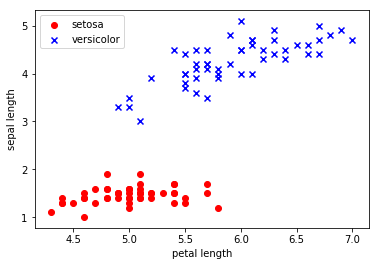

In [41]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.savefig('images/petal_sepal_scatter.png', dpi=200)

Now we train our perceptron algorithm on the Iris data subset that we just extracted. Also, we will plot the _misclassification error_ for each epoch to check if the algorithm converged and found a _decision boundary_ that separates the two Iris ﬂower classes:

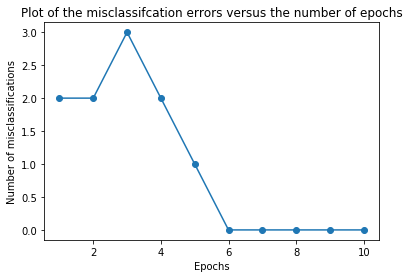

In [40]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Plot of the misclassifcation errors versus the number of epochs')
plt.savefig('images/misclassification_error_vs_epoch.png', dpi=200)

###  A small convenience function to visualize the decision boundaries for 2D datasets:
First, we defne a number of colors and markers and create a color map from the list of colors via `ListedColormap`. Then, we determine the minimum and maximum values for the two features and use those feature vectors to create a pair of grid arrays `xx1` and `xx2` via the NumPy `meshgrid` function. Since we trained our perceptron classifer on two feature dimensions, we need to ﬂatten the grid arrays and create a matrix that has the same number of columns as the Iris training subset so that we can use the predict method to predict the class labels Z of the corresponding grid points. After reshaping the predicted class labels Z into a grid with the same dimensions as `xx1` and `xx2`, we can now draw a contour plot via matplotlib's `contourf` function that maps the different decision regions to different colors for each predicted class in the grid array.

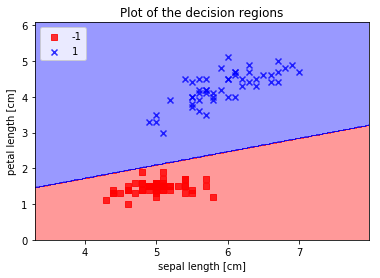

In [39]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Plot of the decision regions')
plt.savefig('images/decision_boundaries.png', dpi=200)